In [4]:
# Library 불러오기
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.python.keras.callbacks import TensorBoard # tensorboard Import
from time import time ## log 만들때 사용

from numpy.random import seed
tf.set_random_seed(1234)

from keras.layers import Input, Dropout
from keras.layers.core import Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [30]:
# 파일 불러오기
df = pd.read_csv("D:/python/Anomaly Detection/dataset/beltconveyor.csv", sep=',')
df.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치
0,0,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 12:00,2.25,3.4,4.85
1,1,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 13:00,2.15,3.4,4.85
2,2,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 14:00,2.07,3.4,4.85
3,3,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 15:00,2.15,3.4,4.85
4,4,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 16:00,2.12,3.4,4.85


In [31]:
# Data Format 수정(날짜)
df_raw = df
#df_raw.index = pd.to_datetime(df_raw["발생일시"], format='%Y-%m-%d %H:%M')
df_raw["id"]= df_raw["센서위치"]+ df_raw["센서종류"]
df_raw.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치,id
0,0,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 12:00,2.25,3.4,4.85,REDUCER DS진동(속도)
1,1,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 13:00,2.15,3.4,4.85,REDUCER DS진동(속도)
2,2,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 14:00,2.07,3.4,4.85,REDUCER DS진동(속도)
3,3,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 15:00,2.15,3.4,4.85,REDUCER DS진동(속도)
4,4,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 16:00,2.12,3.4,4.85,REDUCER DS진동(속도)


In [32]:
df_raw2 = df_raw
df_raw2['발생일시'] = pd.to_datetime(df_raw2['발생일시'], format = '%Y-%m-%d %H:%M')
df_raw2.index = df_raw2['발생일시']
df_raw2.head()

,Unnamed: 0,공장명,센서명,센서위치,Asset,센서종류,단위,발생일시,발생치,주의치,위험치,id
발생일시,,,,,,,,,,,,
2020-05-09 12:00:00,0,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 12:00:00,2.25,3.4,4.85,REDUCER DS진동(속도)
2020-05-09 13:00:00,1,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 13:00:00,2.15,3.4,4.85,REDUCER DS진동(속도)
2020-05-09 14:00:00,2,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 14:00:00,2.07,3.4,4.85,REDUCER DS진동(속도)
2020-05-09 15:00:00,3,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 15:00:00,2.15,3.4,4.85,REDUCER DS진동(속도)
2020-05-09 16:00:00,4,5소결,Flow Dynamic Conveyor (510.201),REDUCER DS,4K5311141,진동(속도),mm/s,2020-05-09 16:00:00,2.12,3.4,4.85,REDUCER DS진동(속도)


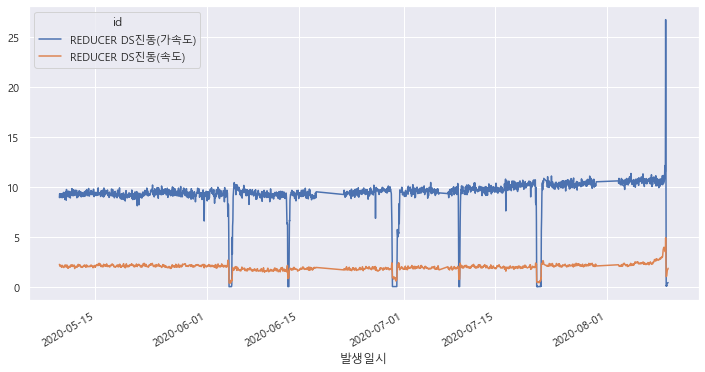

In [33]:
# 데이터 정리(날짜기준)

df_raw3 = df_raw2.pivot(index= '발생일시', columns='id', values='발생치')
df_raw3.plot(figsize=(12,6))

In [34]:
df_raw3.head()

id,REDUCER DS진동(가속도),REDUCER DS진동(속도)
발생일시,,
2020-05-09 12:00:00,8.93,2.25
2020-05-09 13:00:00,9.30,2.15
2020-05-09 14:00:00,8.92,2.07
2020-05-09 15:00:00,9.19,2.15
2020-05-09 16:00:00,9.29,2.12


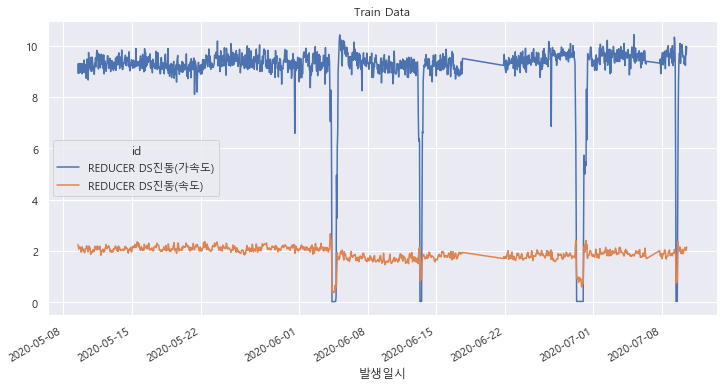

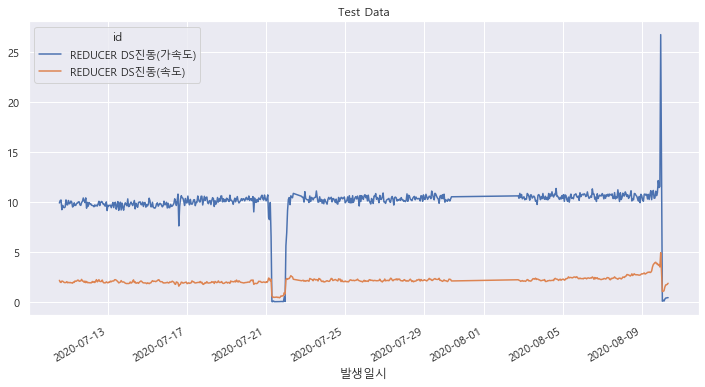

In [36]:
df_train = df_raw3['2020-05-09 12:00:00' : '2020-07-10 12:00:00']
df_test = df_raw3['2020-07-10 13:00:00' :]
df_train.plot(figsize = (12,6), title = 'Train Data')
df_test.plot(figsize= (12,6), title= 'Test Data')

# Data Scaling(Normalize)

In [37]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(df_train),
                      columns = df_train.columns,
                      index = df_train.index)

# Random Shuffle training data
X_train.sample(frac=1)
X_test = pd.DataFrame(scaler.transform(df_test),
                     columns = df_test.columns,
                     index = df_test.index)

In [38]:
seed(10)
act_func = 'elu'
keras.backend.clear_session()  
# Input Layer :
model2 = Sequential(name = "mymodel")

# 첫번째 Hidden Layer > Input Data에 연결
model2.add(Dense(10, activation = act_func,
               kernel_initializer = 'glorot_uniform',
               kernel_regularizer = regularizers.l2(0.0),
               input_shape = (X_train.shape[1],),
               name = "Layer1Encoder"
               )
         )
model2.add(Dense(2,activation=act_func,
               kernel_initializer = 'glorot_uniform',
                name = "Layer2Compressed"))
model2.add(Dense(10, activation = act_func,
               kernel_initializer = 'glorot_uniform',
                name = "Layer3Decoder"))
model2.add(Dense(X_train.shape[1],
               kernel_initializer = 'glorot_uniform',
                name = "Output"))

tensorboard = TensorBoard(log_dir = 'logss/{}'.format(time())) # Tensorboard
model2.compile(loss='mse', optimizer = 'adam')

# Train 설정
NUM_EPOCHS = 100
BATCH_SIZE = 10

In [39]:
model2.summary()

Model: "mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1Encoder (Dense)        (None, 10)                30        
_________________________________________________________________
Layer2Compressed (Dense)     (None, 2)                 22        
_________________________________________________________________
Layer3Decoder (Dense)        (None, 10)                30        
_________________________________________________________________
Output (Dense)               (None, 2)                 22        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fitting the model

history = model2.fit(np.array(X_train), np.array(X_train),
                   batch_size = BATCH_SIZE,
                   epochs = NUM_EPOCHS,
                   validation_split = 0.05,
                   verbose = 1,
                   )

Train on 1290 samples, validate on 68 samples
Epoch 1/100
1290/1290 [==============================] - 0s 299us/step - loss: 0.4694 - val_loss: 0.1273
Epoch 2/100
1290/1290 [==============================] - 0s 145us/step - loss: 0.0299 - val_loss: 0.0162
Epoch 3/100
1290/1290 [==============================] - 0s 158us/step - loss: 0.0066 - val_loss: 0.0145
Epoch 4/100
1290/1290 [==============================] - 0s 139us/step - loss: 0.0058 - val_loss: 0.0122
Epoch 5/100
1290/1290 [==============================] - 0s 141us/step - loss: 0.0047 - val_loss: 0.0094
Epoch 6/100
1290/1290 [==============================] - 0s 142us/step - loss: 0.0035 - val_loss: 0.0065
Epoch 7/100
1290/1290 [==============================] - 0s 152us/step - loss: 0.0024 - val_loss: 0.0041
Epoch 8/100
1290/1290 [==============================] - 0s 158us/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/100
1290/1290 [==============================] - 0s 141us/step - loss: 8.6840e-04 - val_loss: 0.0012
Epoch

1290/1290 [==============================] - 0s 141us/step - loss: 1.1423e-05 - val_loss: 1.4334e-05
Epoch 74/100
1290/1290 [==============================] - 0s 144us/step - loss: 1.2283e-05 - val_loss: 1.7518e-05
Epoch 75/100
1290/1290 [==============================] - 0s 126us/step - loss: 1.1726e-05 - val_loss: 1.1182e-05
Epoch 76/100
1290/1290 [==============================] - 0s 105us/step - loss: 1.1107e-05 - val_loss: 1.7010e-05
Epoch 77/100
1290/1290 [==============================] - 0s 102us/step - loss: 1.0473e-05 - val_loss: 1.8806e-05
Epoch 78/100
1290/1290 [==============================] - 0s 107us/step - loss: 1.0244e-05 - val_loss: 1.1898e-05
Epoch 79/100
1290/1290 [==============================] - 0s 100us/step - loss: 9.5755e-06 - val_loss: 8.5934e-06
Epoch 80/100
1290/1290 [==============================] - 0s 111us/step - loss: 1.0526e-05 - val_loss: 9.1510e-06
Epoch 81/100
1290/1290 [==============================] - 0s 95us/step - loss: 9.0787e-06 - val_loss:

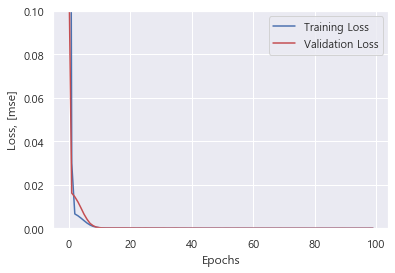

In [41]:
plt.plot(history.history['loss'],'b',
        label= 'Training Loss')
plt.plot(history.history['val_loss'],'r',
        label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.03)

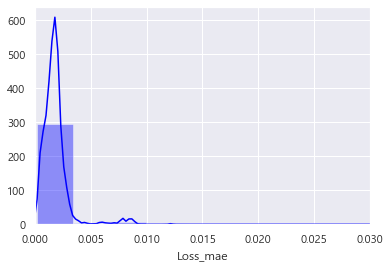

In [45]:
# Training Set에서 Loss Function 분포확인

X_pred = model2.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index = X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis= 1)

plt.figure()
sns.distplot(scored['Loss_mae'],
            bins= 10,
            kde=True,
            color = 'blue');
plt.xlim([0.0,.03])

In [54]:
# 위 loss 분포를 통해 threshold를 0.2로 설정해도 문제없음
X_pred = model2.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis=1)
scored['Threshold'] = 0.05
scored['Anomaly'] = scored['Loss_mae']>scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
발생일시,,,
2020-07-10 13:00:00,0.001372,0.05,False
2020-07-10 14:00:00,0.001410,0.05,False
2020-07-10 15:00:00,0.001685,0.05,False
2020-07-10 16:00:00,0.001770,0.05,False
2020-07-10 17:00:00,0.000613,0.05,False


In [55]:
X_pred_train = model2.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis=1)
scored_train['Threshold']= 0.05
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored = pd.concat([scored_train, scored])


In [58]:
scored.to_csv('D:/python/Anomaly Detection/results/beltconveyor2.csv')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


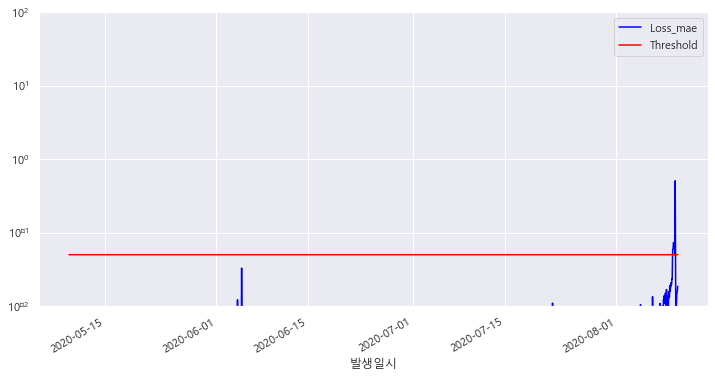

In [56]:
scored.plot(logy=True, figsize = (12,6), ylim=[1e-2, 1e2], color = ['blue', 'red'])